# Load as torch model

Loads the base neural network model and the `sim_to_nn` transformers from their respective files. They are combined to create a `TransformedModel` and tested on a small set of simulation data.

In [1]:
import torch
import matplotlib.pyplot as plt

## Create model

In [2]:
# load base model and transformers
model = torch.load("model/model.pt")
input_sim_to_nn = torch.load("model/input_sim_to_nn.pt")
output_sim_to_nn = torch.load("model/output_sim_to_nn.pt")

In [3]:
# define transformed model class
class TransformedModel(torch.nn.Module):
    def __init__(self, model, input_transformer, output_transformer):
        super(TransformedModel, self).__init__()
        self.model = model
        self.input_transformer = input_transformer
        self.output_transformer = output_transformer
    
    def forward(self, x):
        x = self.input_transformer(x)
        x = self.model(x)
        x = self.output_transformer.untransform(x)
        return x

In [4]:
# create transformed model
transformed_model = TransformedModel(
    model=model, 
    input_transformer=input_sim_to_nn,
    output_transformer=output_sim_to_nn,
).to(torch.double)
transformed_model

TransformedModel(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=100, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=100, out_features=200, bias=True)
    (3): ELU(alpha=1.0)
    (4): Dropout(p=0.05, inplace=False)
    (5): Linear(in_features=200, out_features=200, bias=True)
    (6): ELU(alpha=1.0)
    (7): Dropout(p=0.05, inplace=False)
    (8): Linear(in_features=200, out_features=300, bias=True)
    (9): ELU(alpha=1.0)
    (10): Dropout(p=0.05, inplace=False)
    (11): Linear(in_features=300, out_features=300, bias=True)
    (12): ELU(alpha=1.0)
    (13): Dropout(p=0.05, inplace=False)
    (14): Linear(in_features=300, out_features=200, bias=True)
    (15): ELU(alpha=1.0)
    (16): Dropout(p=0.05, inplace=False)
    (17): Linear(in_features=200, out_features=100, bias=True)
    (18): ELU(alpha=1.0)
    (19): Dropout(p=0.05, inplace=False)
    (20): Linear(in_features=100, out_features=100, bias=True)
    (21): ELU(alpha=1.0)
    (22): Linear(in_

## Test on example data

In [5]:
# load example data and calculate predictions
inputs_small = torch.load("info/inputs_small.pt")
outputs_small = torch.load("info/outputs_small.pt")
with torch.no_grad():
    predictions = transformed_model(inputs_small)

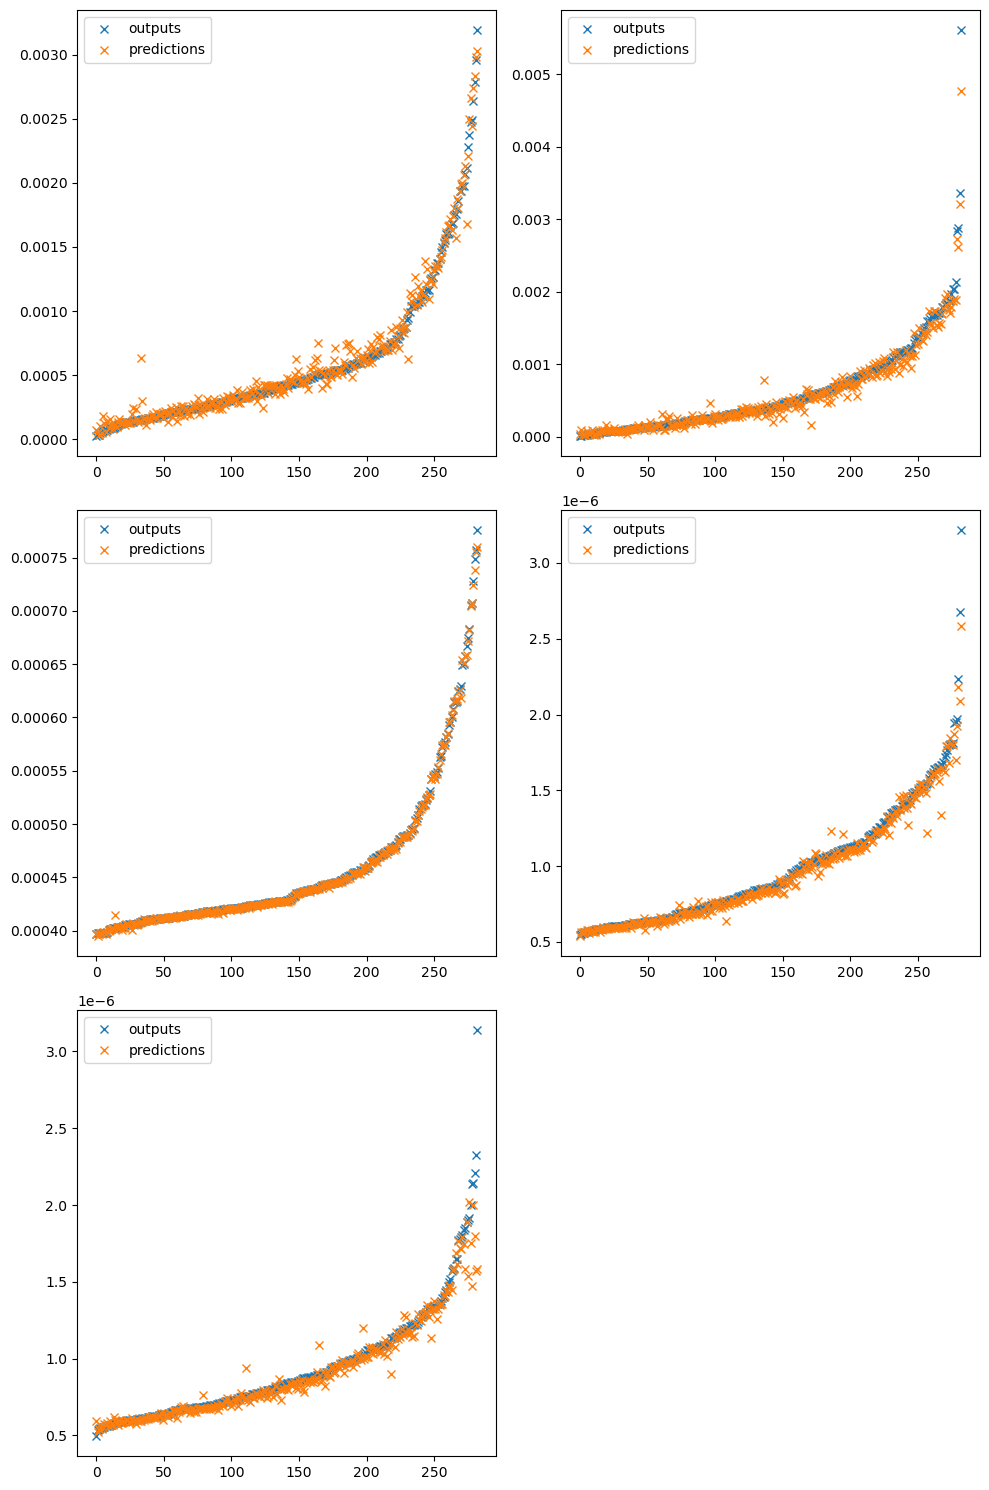

In [6]:
# plot example data and predictions
nrows, ncols = 3, 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))
for i in range(nrows * ncols):
    ax_i = ax[i // ncols, i % ncols]
    if i < outputs_small.shape[1]:
        sort_idx = torch.argsort(outputs_small[:, i])
        x_axis = torch.arange(outputs_small.shape[0])
        ax_i.plot(x_axis, outputs_small[sort_idx, i], "C0x", label="outputs")
        ax_i.plot(x_axis, predictions[sort_idx, i], "C1x", label="predictions")
        ax_i.legend()
ax[-1, -1].axis('off')
fig.tight_layout()